In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt


In [47]:
Samples = 100
Nsims = 500
T = 20 #num of time slots
N = 6 # num of nodes

nodes = np.zeros(N)
slots = np.zeros(T)
probs = np.linspace(0,1,Samples)
s = np.zeros(probs.shape)
simRes = np.zeros((Nsims,probs.shape[0]))




Simulation result for 500 simulations


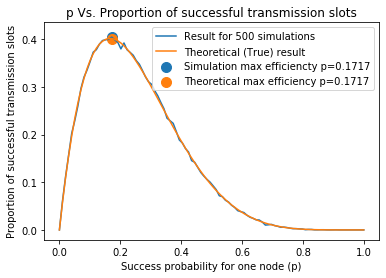

In [52]:
meanS, s = runSim(simRes, probs, T, N)
plotRes(probs, meanS/T, s, Nsims)

Running Nsims: 100.0
Running Nsims: 200.0
Running Nsims: 300.0
Running Nsims: 400.0
Running Nsims: 500.0
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


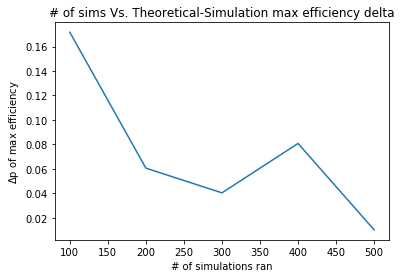

In [56]:

nMetaSimsToRun = 5
plotMultiSimEfficiency(nMetaSimsToRun, probs, T, N)

In [53]:
def plotMultiSimEfficiency(nMetaSims, probs, T, N):
    simsArray = np.linspace(100,500,nMetaSims)
    e = np.zeros(len(simsArray))
    for sim in range(len(simsArray)):
        print(f"Running Nsims: {simsArray[sim]}")
        simRes = np.zeros((sim,probs.shape[0]))
        meanS, s = runSim(simRes, probs, T, N)
        
        th_p = probs[np.argmax(meanS)]
        sim_p = probs[np.argmax(s)]
        e[sim] = np.absolute(th_p-sim_p)

    plt.plot(simsArray, e, label=f'# of sims Vs. Theoretical-Simulation delta')
    plt.title("# of sims Vs. Theoretical-Simulation max efficiency delta")
    plt.xlabel("# of simulations ran")
    plt.ylabel(r"$\Delta$p of max efficiency")


In [50]:
def runSim(simRes, probs, T, N):
    s = np.zeros(probs.shape)
    nodes = np.zeros(N)
    slots = np.zeros(T)
    for j in range(simRes.shape[0]):
        for i in range(simRes.shape[1]):
            p = probs[i]
            for t in range(T): 
                for n in range(N):
                    r = random.uniform(0, 1)
                    nodes[n] = 1 if r<=p else 0
                slots[t] = 1 if np.sum(nodes)==1 else 0
            simRes[j][i] = np.sum(slots)
    meanS = np.mean(simRes, axis=0)
    #Theoretical result
    for i in range(simRes.shape[1]):
        p = probs[i]
        s[i] = N*p*(1-p)**(N-1)
        
    return meanS, s
   

In [5]:
def plotRes(probs, meanS, s, Nsims):
    plt.close("all")
    print(f"Simulation result for {Nsims} simulations")

    plt.plot(probs, meanS,
             label=f"Result for {Nsims} simulations")
    plt.scatter(probs[np.argmax(meanS)],
                meanS[np.argmax(meanS)], s=100, label=f"Simulation max efficiencty p={probs[np.argmax(meanS)]:.4f}")

    plt.plot(probs, s, label='Theoretical (True) result')
    plt.scatter(probs[np.argmax(s)], s[np.argmax(s)],
                s=100, label=f"Theoretical max efficiency p={probs[np.argmax(s)]:.4f}")

    plt.title('p Vs. Proportion of successful transmission slots')
    plt.xlabel('Success probability for one node (p)')
    plt.ylabel('Proportion of successful transmission slots')
    plt.legend()
    plt.show(block=False)
